In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

Load Data

In [35]:
data_path = "/Users/sonn/Sonn/Workspace/Projects/IonBatteryQML/data/CrystalLithiumIonBattery.csv"


In [36]:
data = pd.read_csv(data_path)
data.head(3)


,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic


In [37]:
# data = data.drop(columns=["Density (gm/cc)"])

In [38]:
data

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic
...,...,...,...,...,...,...,...,...,...,...,...
334,mp-764961,Li6Co(SiO4)2,P1,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic
335,mp-849520,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic
336,mp-849656,Li5Co4(Si3O10)2,P1,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic
337,mp-763557,LiCoSiO4,P1,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic


Data preprocessing

In [39]:
le = LabelEncoder()
data["Has Bandstructure Encoded"] = le.fit_transform(data["Has Bandstructure"])
data["Spacegroup Encoded"] = le.fit_transform(data["Spacegroup"])

In [40]:
data = data.drop(columns=["Materials Id", "Formula", "Has Bandstructure", "Spacegroup"])
data = data.dropna()

In [41]:
data_encoded = data.copy()

In [42]:
data_encoded["Crystal System Encoded"] = le.fit_transform(data_encoded["Crystal System"])

In [43]:
data_encoded.drop(columns=["Crystal System"], inplace=True)

In [44]:
data

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Crystal System,Has Bandstructure Encoded,Spacegroup Encoded
0,-2.699,0.006,3.462,16,2.993,178.513,monoclinic,1,31
1,-2.696,0.008,2.879,32,2.926,365.272,monoclinic,1,21
2,-2.775,0.012,3.653,28,2.761,301.775,monoclinic,1,6
3,-2.783,0.013,3.015,38,2.908,436.183,monoclinic,1,1
4,-2.747,0.016,2.578,36,3.334,421.286,monoclinic,1,1
...,...,...,...,...,...,...,...,...,...
334,-2.545,0.071,2.685,17,2.753,171.772,triclinic,1,16
335,-2.250,0.076,0.005,42,3.318,552.402,triclinic,1,16
336,-2.529,0.082,0.176,35,2.940,428.648,triclinic,1,16
337,-2.348,0.087,1.333,14,2.451,214.044,triclinic,1,16


Correlation Analysis

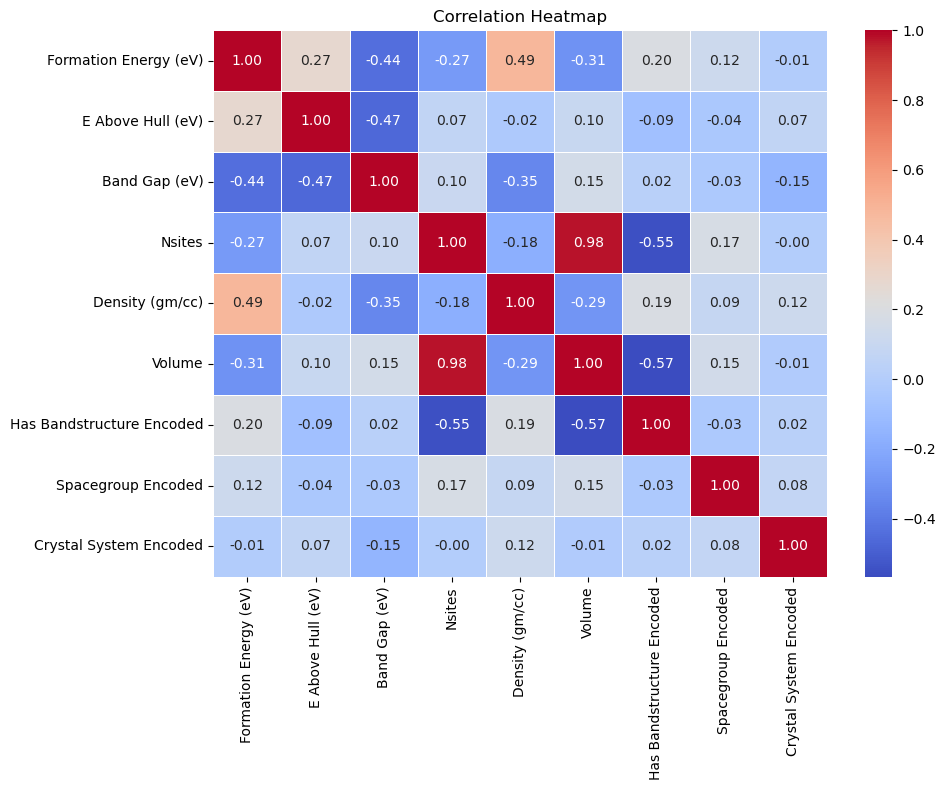

In [45]:
numeric_cols = data_encoded.select_dtypes(include='number')
corr_matrix = numeric_cols.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Test Train Split

In [46]:
X = data.drop(columns=["Crystal System"])

In [47]:
y = data["Crystal System"]

In [48]:
y = le.fit_transform(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((271, 8), (68, 8), (271,), (68,))

In [51]:
scaler = StandardScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.95      0.91      0.93        22
           2       1.00      1.00      1.00         9

    accuracy                           0.96        68
   macro avg       0.97      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68

Confusion Matrix:
 [[36  1  0]
 [ 2 20  0]
 [ 0  0  9]]


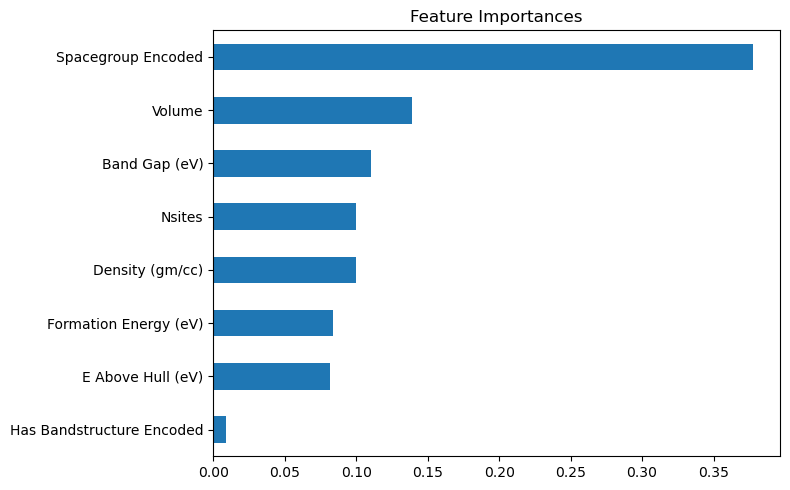

In [53]:
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

importances = clf.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_imp.head(10).plot(kind='barh')
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


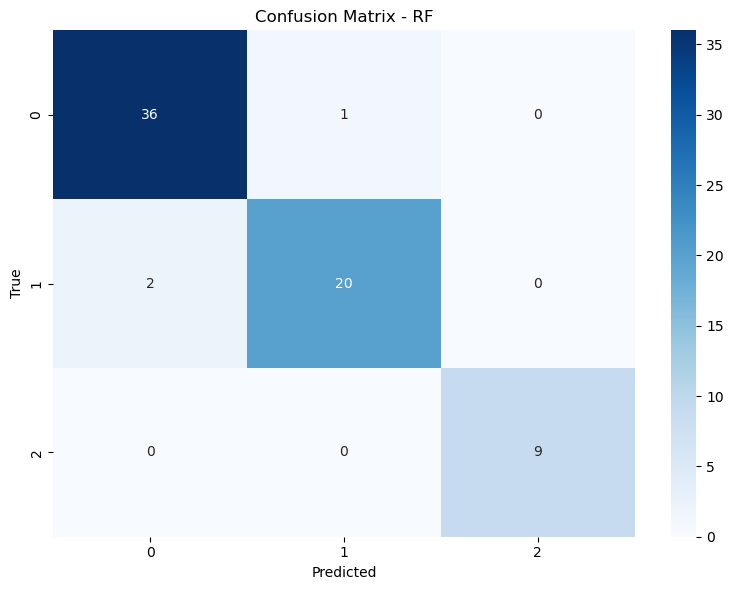

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - RF")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [55]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9558823529411765
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.95      0.91      0.93        22
           2       1.00      1.00      1.00         9

    accuracy                           0.96        68
   macro avg       0.97      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68



Support Vector Machine

In [56]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71        37
           1       0.74      0.64      0.68        22
           2       0.54      0.78      0.64         9

    accuracy                           0.69        68
   macro avg       0.67      0.71      0.68        68
weighted avg       0.70      0.69      0.69        68

Confusion Matrix:
 [[26  5  6]
 [ 8 14  0]
 [ 2  0  7]]


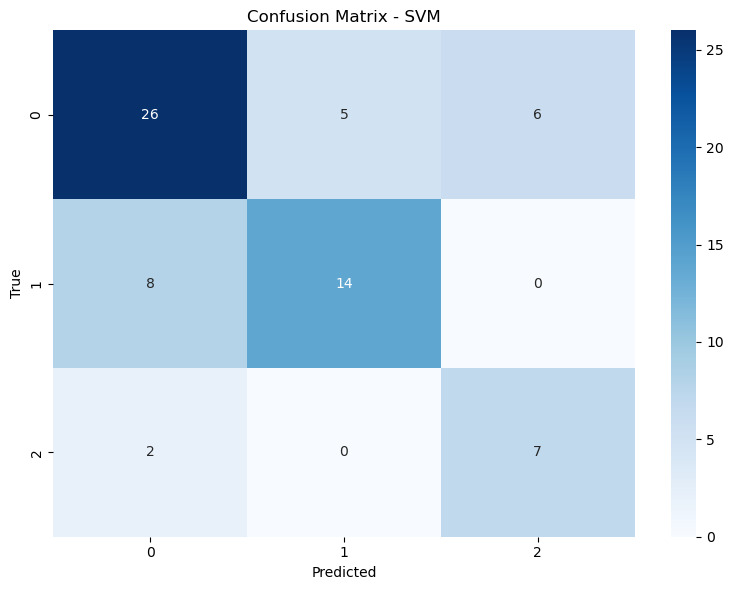

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6911764705882353
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        37
           1       0.74      0.64      0.68        22
           2       0.54      0.78      0.64         9

    accuracy                           0.69        68
   macro avg       0.67      0.71      0.68        68
weighted avg       0.70      0.69      0.69        68



TopoDR

In [59]:
import numpy as np
import tensorflow as tf
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

In [60]:
X = data.drop(columns=["Crystal System"])

In [61]:
X

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure Encoded,Spacegroup Encoded
0,-2.699,0.006,3.462,16,2.993,178.513,1,31
1,-2.696,0.008,2.879,32,2.926,365.272,1,21
2,-2.775,0.012,3.653,28,2.761,301.775,1,6
3,-2.783,0.013,3.015,38,2.908,436.183,1,1
4,-2.747,0.016,2.578,36,3.334,421.286,1,1
...,...,...,...,...,...,...,...,...
334,-2.545,0.071,2.685,17,2.753,171.772,1,16
335,-2.250,0.076,0.005,42,3.318,552.402,1,16
336,-2.529,0.082,0.176,35,2.940,428.648,1,16
337,-2.348,0.087,1.333,14,2.451,214.044,1,16


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/stepWARNING:tensorflow:6 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x36bbcf560> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


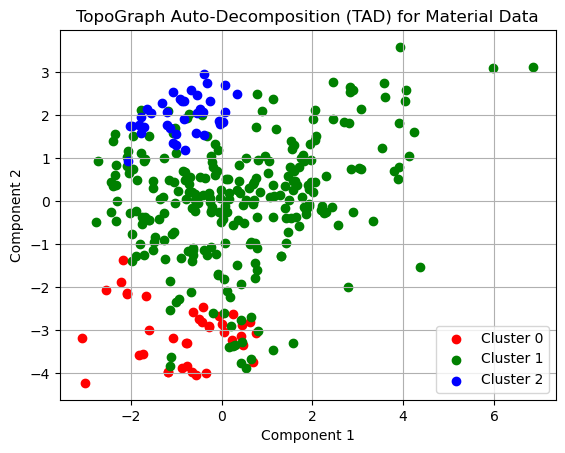

In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

X = X.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Tạo đồ thị kNN và phân cụm
A = kneighbors_graph(X_scaled, 10, mode='connectivity', include_self=True)
labels = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42).fit_predict(X_scaled)

# 4. Hàm tạo Autoencoder
def build_autoencoder(input_dim, bottleneck_dim):
    encoder = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(bottleneck_dim)
    ])
    decoder = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(bottleneck_dim,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(input_dim)
    ])
    return encoder, decoder

# 5. Huấn luyện Autoencoder cho từng cụm
autoencoders = []
reduced_X = np.zeros((X.shape[0], 2))

for c in np.unique(labels):
    idx = np.where(labels == c)[0]
    X_c = X_scaled[idx]
    
    encoder, decoder = build_autoencoder(input_dim=X.shape[1], bottleneck_dim=2)
    input_ = tf.keras.Input(shape=(X.shape[1],))
    output_ = decoder(encoder(input_))
    
    model = tf.keras.Model(inputs=input_, outputs=output_)
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_c, X_c, epochs=50, batch_size=32, verbose=0)
    
    reduced_X[idx] = encoder.predict(X_c)
    autoencoders.append((encoder, decoder))

# 6. Vẽ kết quả
colors = ['red', 'green', 'blue']
for c in np.unique(labels):
    idx = labels == c
    plt.scatter(reduced_X[idx, 0], reduced_X[idx, 1], color=colors[c], label=f'Cluster {c}')
plt.legend()
plt.title("TopoGraph Auto-Decomposition (TAD) for Material Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


In [63]:
# Tạo DataFrame sau giảm chiều
reduced_df = pd.DataFrame(reduced_X, columns=["Comp1", "Comp2"])
reduced_df["Cluster"] = labels  # Label phân cụm được dùng như nhãn phân loại


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_class = reduced_df[["Comp1", "Comp2"]].values
y_class = reduced_df["Cluster"].values

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)


In [65]:
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)



In [66]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9558823529411765
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.95      1.00      0.97        52
           2       1.00      0.88      0.93         8

    accuracy                           0.96        68
   macro avg       0.98      0.88      0.92        68
weighted avg       0.96      0.96      0.95        68

